#### Loading in packages and data 

In [1]:
import pandas as pd 
import numpy as np
import statistics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("rocket")

import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option("display.max_columns", None)
bank_df = pd.read_csv('/Users/lois/Downloads/ML ipynb/Module 17/data/bank-additional-full.csv', sep = ';')

In [7]:
#subsetting df 
df = bank_df[["pdays", "default", "marital", "loan", "nr.employed", "y"]]
df.head()

,pdays,default,marital,loan,nr.employed,y
0,999,no,married,no,5191.0,no
1,999,unknown,married,no,5191.0,no
2,999,no,married,no,5191.0,no
3,999,no,married,no,5191.0,no
4,999,no,married,yes,5191.0,no


In [13]:
#encoding and renaming y column

df.rename({"y" : "subscribed"}, axis = 1, inplace = True)
df["subscribed"].replace({"no" : 0, "yes" : 1}, inplace = True)

#### Evaluation of top 5 features
After assessing the regression models, we found the features most significant for predicting subscription status to be pdays, default, marital, loan, and nr.employed. In following our business objective to identify the attributes that characterize subscribing clients, we will now examine these five features and their relationships with subscription status. Note that graphs colored by a feature show the proportion, rather than count, of that feature.  

#### Analyzing the distribution of subscribed
This plot shows that the vast majority of clients did not accept the bank term deposit subscription. We will further break down and analyse the feature values of clients that subscribed.   

Text(0.5, 1.0, 'Subscription Counts')

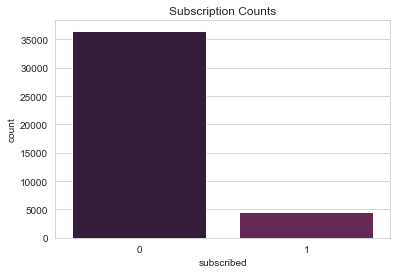

In [16]:
sns.countplot(data = df, x = df["subscribed"]).set_title("Subscription Counts")

#### Number of Employees vs Subscribed
The feature most correlated with subscription status is nr.employed, which specifies the number of employees. This is negatively correlated with subscription status, meaning that a lower number of employees is correlated with client subscription. 

The first histogram displays the distribution of subscriptions (0 = not subscribed, 1 = subscribed). It shows that the majority group of nr.employed seen with nonsubscribers is 5228, followed by 5191, while the majority group of subscribers is 5099 employees, followed by the 5228. 

[Text(0.5, 1.0, 'Distribution of subscription colored by nr.employed')]

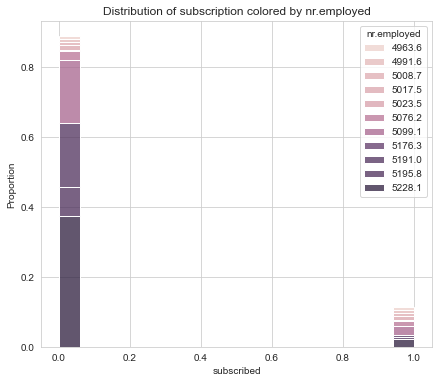

In [89]:
#histogram of subscription status colored by nr.employed
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "subscribed", hue = "nr.employed", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of subscription colored by nr.employed")


This histogram shows the distribution of nr.employed colored by subscription status. Most marketing campaigns involved 5228 employees, the count of which constitutes the majority group within non-subscribers, as shown above. 5099 employees is the second highest number of employees, and this employee count constitutes the majority group within subscribers. 

[Text(0.5, 1.0, 'Distribution of nr.employed colored by subscribed')]

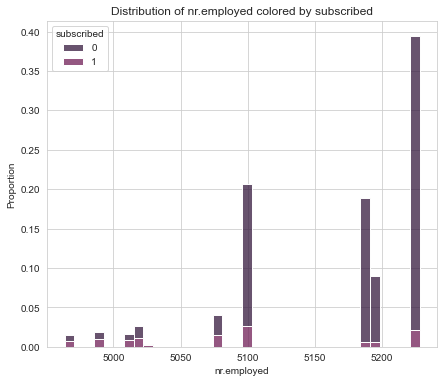

In [90]:
#histogram of nr.employed colored by subscription status
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "nr.employed", hue = "subscribed", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of nr.employed colored by subscribed")

#### Days Passed vs Subscribed
The second highest correlated feature with subscription status is pdays, which records the number of days that have passed since the client was last contacted. Note that the value 999 means the client was not previously contacted.

This histogram displays the distribution of pdays colored by subscription (0 = not subscribed, 1 = subscribed). It shows that clients that have not been previously contacted largely do not subscribe, while the majority of clients that have been previously contacted subscribed.

[Text(0.5, 1.0, 'Distribution of pdays colored by subscribed')]

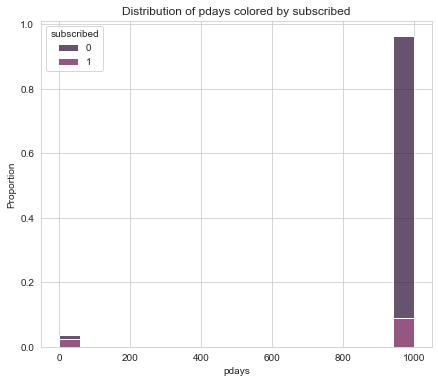

In [91]:
#histogram of subscription status colored by pdays
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "pdays", hue = "subscribed", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of pdays colored by subscribed")

##### Further analyzing clients that have been previously contacted 
Here, we select instances where clients have been previously contacted. This histogram shows that the majority of clients last contacted 6, 3, and 4 days prior were subscribers. 

[Text(0.5, 1.0, 'Distribution of pdays colored by subscribed')]

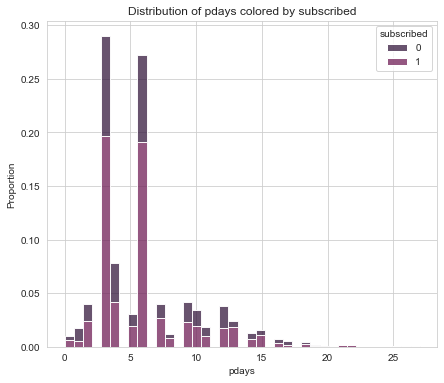

In [66]:
#histogram of subscription status colored by nr.employed
plt.figure(figsize = (7, 6))

sns.histplot(data = df[df["pdays"] != 999], x = "pdays", hue = "subscribed", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of pdays colored by subscribed")

##### Marital Status vs Subscribed  
We will now be analyzing the marital status of clients, the options of which are married, single, divorced, and unknown. 

The first histogram displays the distribution of subscriptions (0 = not subscribed, 1 = subscribed) colored by marital status. It shows that the top two groups of both subscribers and unsubscribers are married and single.

[Text(0.5, 1.0, 'Distribution of subscription colored by marital status')]

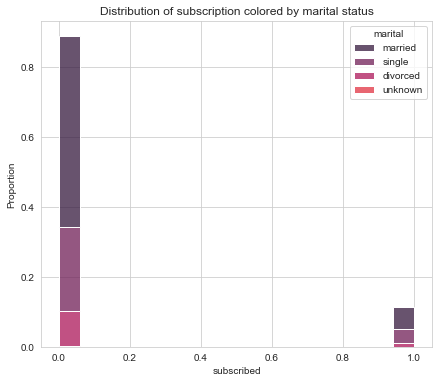

In [92]:
#histogram of subscribed colored by marital status 
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "subscribed", hue = "marital", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of subscription colored by marital status")

This histogram shows the distribution of marital status colored by subscribed. While the majority of every marital group did not subscribe, those divorced have an especially low rate of subscription. 

[Text(0.5, 1.0, 'Distribution of marital status colored by subscribed')]

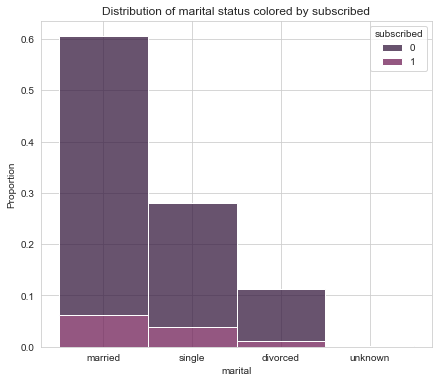

In [93]:
#histogram of marital colored by subscribed
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "marital", hue = "subscribed", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of marital status colored by subscribed")

##### Loan vs Subscribed
The next feature we will analyse is loan, which specifies whether the client has a personal loan (options: yes, no, unknown). 

The first histogram displays the distribution of subscriptions (0 = not subscribed, 1 = subscribed) colored by loan status. It shows that the the majority of both subscribers and unsubscribers do not have a loan. Unsubscribers have a higher proportion of clients in the yes and unknown group. 

[Text(0.5, 1.0, 'Distribution of subscription colored by loan')]

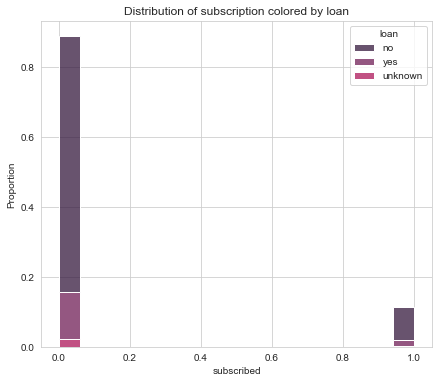

In [94]:
#histogram of subscribed colored by loan status 
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "subscribed", hue = "loan", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of subscription colored by loan")

This histogram shows the three loan statuses colored by subscribed. Those in the no column have a higher proportion of subscribers than those in the yes and unknown column. 

[Text(0.5, 1.0, 'Distribution of loan status colored by subscribed')]

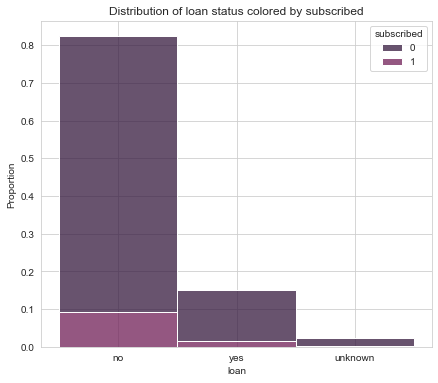

In [95]:
#histogram of loan colored by subscribed
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "loan", hue = "subscribed", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of loan status colored by subscribed")

##### Default vs Subscribed 
The last feature we will analyse is default, which specifies whether the client has credit in default (values: yes, no, unknown).

The first histogram displays the distribution of subscriptions (0 = not subscribed, 1 = subscribed) colored by default status. It shows that although the majority of both subscribers and unsubscribers do not have credit in default, a higher proportion of nonsubscribers have an unknown default status, and a higher proportion of subscribers have no credit in default. 

[Text(0.5, 1.0, 'Distribution of subscription colored by default status')]

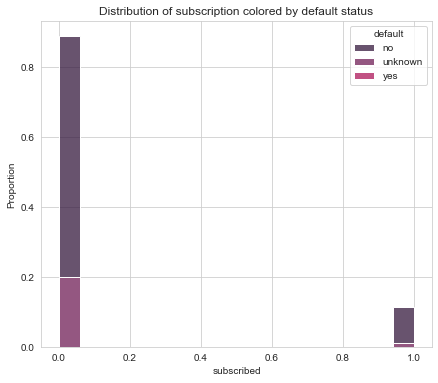

In [101]:
#histogram of subscribed colored by default
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "subscribed", hue = "default", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of subscription colored by default status")

This histogram shows the distribution of default colored by subscribed. It shows a greater proportion of clients with no credit in default subscribing than clients with an unknown default status. 

[Text(0.5, 1.0, 'Distribution of default status colored by subscribed')]

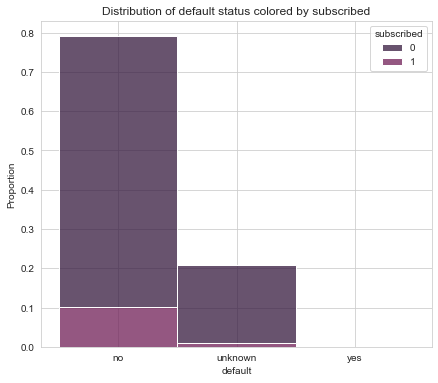

In [99]:
#histogram of subscribed colored by default
plt.figure(figsize = (7, 6))

sns.histplot(data = df, x = "default", hue = "subscribed", 
             multiple = "stack", stat = "proportion").set(title = "Distribution of default status colored by subscribed")

It is not clear whether clients with credit in default ended up accepting the loan, but seeing as only three clients in our sample have credit in default, we do not have enough data to make a strong conclusion.   

In [80]:
df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

### Summary
The five most important features for predicting the subscription status of a client are the number of employees, number of days since the most recent contact, marital status, loan status, and default status. In essence, a lower number of employees is correlated with a client's subscription (5099 employees has the highest subscriptions count). Clients most recently contacted 3-6 days largely accepted the subscription. Additionally, subscribers tend to be married or single, while divorced individuals are not likely to subscribe. Subscribers do not tend to have a personal loan taken out, while nonsubscribers are more likely to have either an unknown or positive loan status. Finally, both subscribers and unsubscribers tend to have no credit in default, but nonsubscribing clients have a higher proportion of individuals with an unknown credit default status. 

### Next Steps and Recommendations 
- Because the number of employees is negatively correlated with subscribers, it is recommended that **the employee count be brought towards and kept from exceeding 5,100**. 
- Clients that have not been previously contacted do not tend to subscribe, while the majority of subscribing clients have been previously contacted 3-6 times, so **multiple (at least 3, aim for 6) calls made to the same individual is highly recommended**. 
- An overwhelming majority of divorced clients turned down the subscription offer, so **employees should not target divorced individuals**.
- **Employees should instead prioritize clients that are married or single**.
- Unsubscribers have a higher proportion of individuals with a personal loan, while clients without a personal loan have a higher proportion of subscribers. As a result, **employees should focus on targetting individuals who do not have a personal loan**. 
- A greater proportion of clients with no credit default were subscribers than clients with an unknown default status, so **employees should target individuals of whom they are confident have no credit in default**. 